__first we import the libraries that we need__

ابتدا کتابخونه های مورد نیازمون رو ایمپورت میکنیم

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

__then we read our csv file using one of `pandas` functions called `read_csv()`__

بعد از آن فایل اطلاعاتمون رو با یکی از تابع های کتابخونه 

`pandas`

یعنی 

`read_csv()`

باز میکنیم

In [2]:
#reading data from csv file
csv = pd.read_csv('/home/arash/dev/python-workspace/sources/insurance.csv')

__we can extract each of our columns using `tolist() `function and add two arrays to specify our numeric and nominal columns__

میتوانیم هر ستون را با استفاده از 

`tolist()`

در یک متغیر جداگانه ذخیره کنیم و همچنین دو آرایه تعریف میکنیم تا داده های 

numeric

و 

nominal 

خود را مشخص کنیم

In [3]:
# Extract columns
ages = csv['age'].tolist()
sexes = csv['sex'].tolist()
bmis = csv['bmi'].tolist()
children = csv['children'].tolist()
smoker = csv['smoker'].tolist()
regions = csv['region'].tolist()
charges = csv['charges'].tolist()

numerical_columns = ['age', 'bmi', 'children', 'charges']
nominal_columns = ['sex', 'smoker', 'region']

__Here are the first ten rows of our data we show them using `head(10)`. with changing the int that we are giving to this function we can change the number of showing rows__

ده سطر اول داده های ما به شکل زیر است ما میتوانیم با استفاده از

`head(10)`

آن ها را نشان دهیم. با تغییر عددی که به عنوان ورودی به این تابع میدهیم میتوانیم تعداد سطر های خروجی را تغییر دهیم


In [4]:
print("Here are the first 10 rows of our data:")
print(csv.head(10))

Here are the first 10 rows of our data:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


__The summary of our numerical values is displayed using the `describe()` function. This function shows five-number summary, count of our records for each column and std (standard deviation) of our columns.__

خلاصه ای از داده های 

numerical 

ما که از طریق تابع

`describe()`

آن را نمایش میدهیم این تابع به ما 

q1, q2, q3, mean, min, max

انحراف از معیار و تعداد رکورد ها را میدهد

In [5]:
print("\nA summary of our numerical data:")
print(csv.describe())


A summary of our numerical data:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


__Count of our unique values for each columns displayed using `nunique()`__

تعداد مقادیر منحصر به فرد ما برای هر ستون با استفاده از 

`nunique()`

نمایش داده میشه

In [6]:
print("Count of unique values for each column:")
print(csv.nunique())

Count of unique values for each column:
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


__Count of non-null values can be displayed using `count()` function__

تعداد رکورد های ثبت شده ما که خالی نیستند با استفاده از تابع

‍`count()`

برای هر ستون نمایش داده میشه

In [7]:
print("Count of non-null values for each column:")
print(csv.count())

Count of non-null values for each column:
age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64


__we can show the count of records for each of our nominal values using `value_counts()` function__

با استفاده از تابع 

`value_counts()`

میتوانیم تعداد رکورد های ثبت شده برای هرکدام از مقادیر

nominal 

خود را ببینیم

In [8]:
for column in nominal_columns:
    print(f"\nValue counts for {column}:")
    print(csv[column].value_counts())


Value counts for sex:
male      676
female    662
Name: sex, dtype: int64

Value counts for smoker:
no     1064
yes     274
Name: smoker, dtype: int64

Value counts for region:
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


__for displaying a correlation matrix of our numeric values we shoul use `corr()` function of `seaborn` library. after that we can use `heatmap()` function to show a heatmap of our matrix, this function will take our correlation matrix, annotation boolean which showes the the normalized values of each section, cmap which technically the color theme for our hitmap and fmt that specifies the floating numbers of our annotation.__

برای نمایش یک

correlation matrix

از تابع 

`corr()`

در کتابخانه 

`seaborn`

استفاده میکنیم. بعد از آن میتوانیم با استفاده از تابع 

`heatmap()`

به صورت یک 

heatmap

ماتریکس خودمون رو نشون بدیم. این تابع

correlation_matrix, annot, cmap, fmt

را به عنوان ورودی میگیرد

annot

یک متغیر صحیح و غلط است که اگر صحیح باشد به ما عدد های

normalize

شده را روی هیت مپ نشان میدهد

cmap

تعیین کننده تم رنگی انتخاب شده برای هیت مپ ما است و 

fmt

مشخص میکند که اعداد نمایش داده شده روی هیت مپ تا چند رقم اعشار نمایش داده شوند


Correlation matrix for our numeric data:


/tmp/ipykernel_10886/3943681415.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = csv.corr()


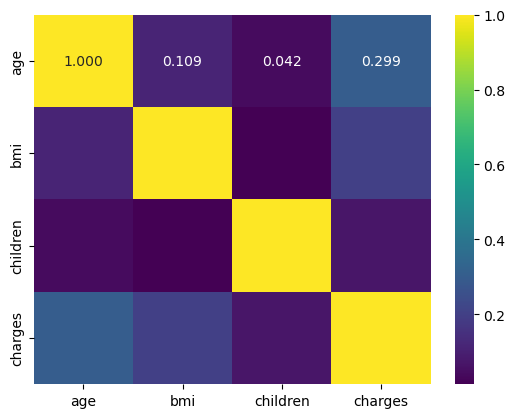

In [9]:
correlation_matrix = csv.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".3f")
print("\nCorrelation matrix for our numeric data:")
plt.show()

__for showing a histogram plot for each of our numerical values we can use `hist()` function of `matplotlib.pyplot` library. this function will take column name, bins, edgecolor and color and shows us the histogram. column name, edgecolor and color are self explanatory, but `bins=20` is the parameter that says you want to divide the range of values into 20 sections (bins). The histogram will display the frequency of data points in each of these 20 bins__

برای نمایش نمودار هیستوگرام ما میتوانیم از تابع

`hist()`

در کتابخوانه 

`matplotlib.pyplot`

استفاده کینم. این تابع اسم ستون

bins, edgecolor و color

رو میگیره و هیستوگرام رو به ما نمیاش میده. اسم ستون و

edgecolor و color

که نیاز به توضیح ندارند اما 

`bins=20`

یعنی رنج مقادیر هیستوگرام رو به ۲۰ قسمت تقسیم کن 

`hist()`

 هم بعد از خوندن این متغیر رنج مقادیر ما رو به ۲۰ قسمت تقسیم میکند و به ما نمایش میدهد

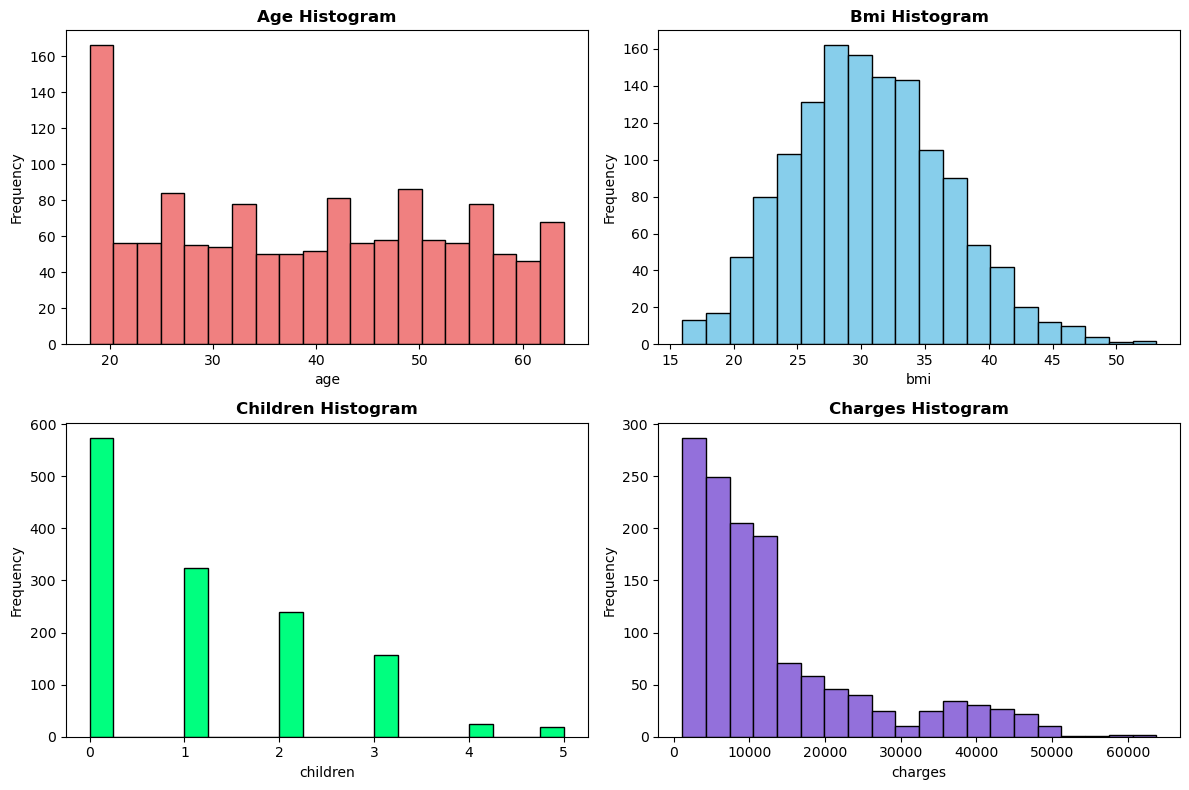

In [10]:
# create a 2 * 2 grid of subplots
# figsize is in inches
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

colors = ['lightcoral', 'skyblue', 'springgreen', 'mediumpurple']

# enumarate() returns pairs of (index, element)
for index, column in enumerate(numerical_columns):
    # floor division of i / 2
    row_index = index // 2

    # remainder of division i / 2
    col_index = index % 2
    
    axes[row_index, col_index].hist(csv[column], bins=20, edgecolor='black', color=colors[index])
    axes[row_index, col_index].set_title(f"{column.capitalize()} Histogram", fontweight='bold')
    axes[row_index, col_index].set_xlabel(f"{column}")
    axes[row_index, col_index].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

__for showing a 2D histogram plot we used the `hist2d()` function it basically works like the `hist()` but it takes two of our column names (one for x axes of the plot and one for y axes of it) not just one of them__

برای نمایش نمودار هیستوگرام ۲بعدی ما از تابع

`hist2d()`

استفاده میکنیم که تغریبا مثل تابع

`hist()`

کار میکند با این تفاوت که این تابع اسم دو ستون را میگیرد یکی برای جهت افقی نمودار و یکی برای جهت عمودی نمودار

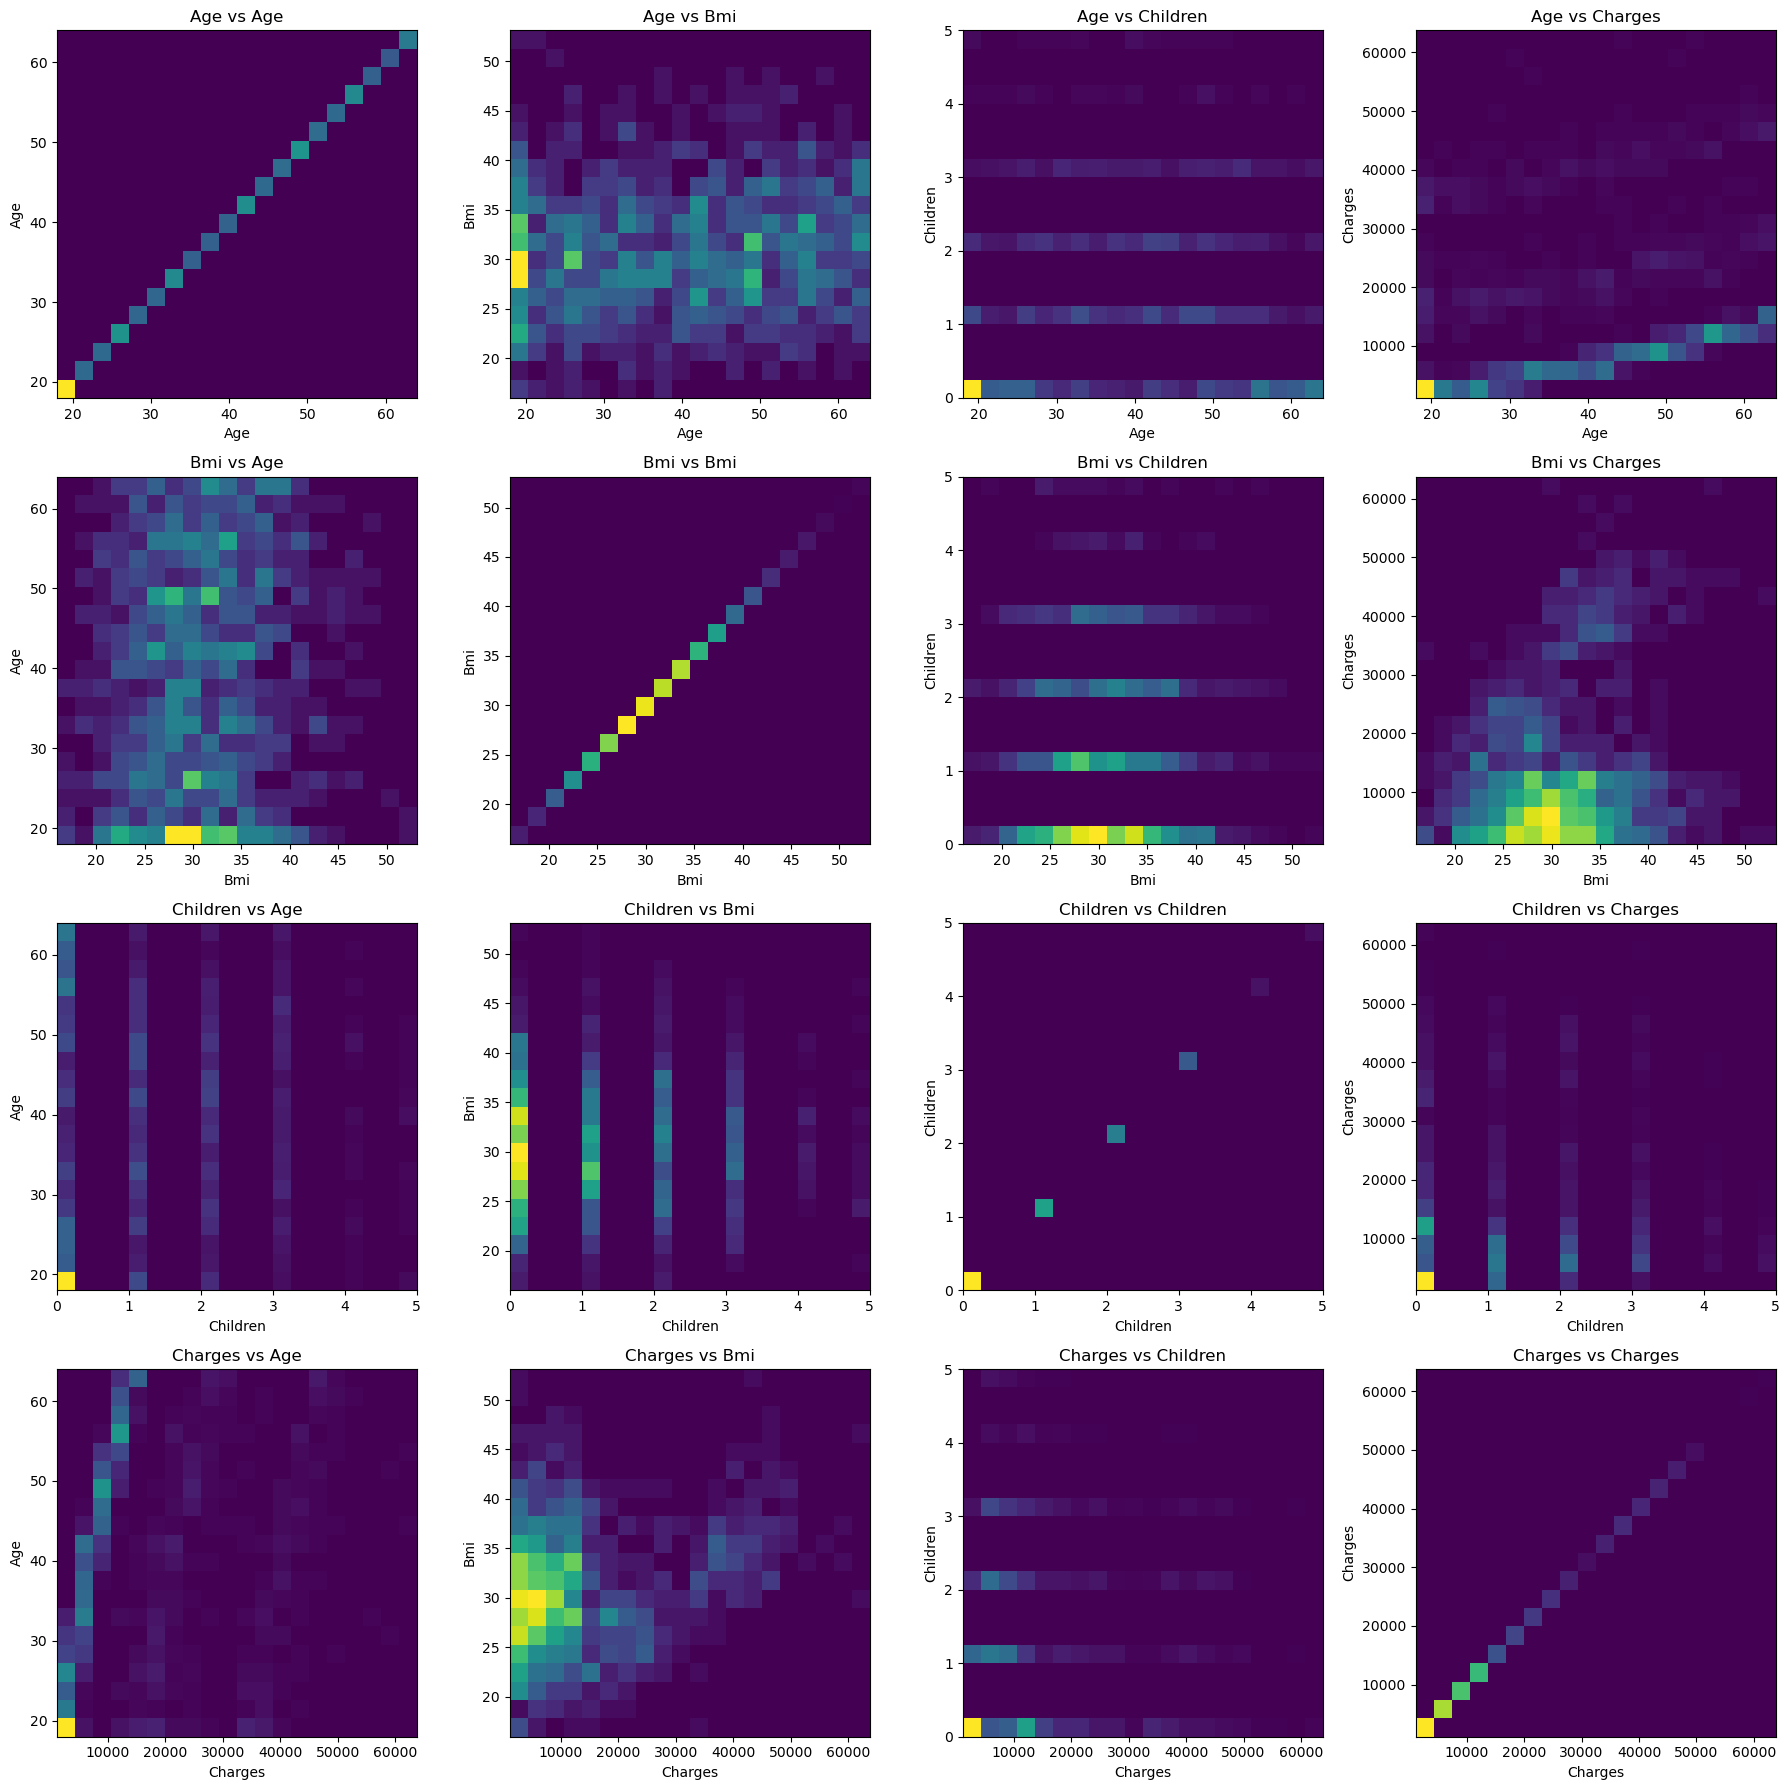

In [11]:
# Specify the indices you want to include
x_included_indicies = [0, 1, 2, 3]
y_included_indicies = [0, 1, 2, 3]

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(18, 18))

# Plot 2D histograms for pairs of numerical columns with specific indices
for i, (index_x, column_x) in enumerate(zip(range(len(numerical_columns)), numerical_columns)):
    if index_x in x_included_indicies:
        for j, (index_y, column_y) in enumerate(zip(range(len(numerical_columns)), numerical_columns)):
            if index_y in y_included_indicies:
                ax = axes[i, j]
                ax.hist2d(csv[column_x], csv[column_y], bins=20, cmap='viridis')
                ax.set_title(f'{column_x.capitalize()} vs {column_y.capitalize()}')
                ax.set_xlabel(column_x.capitalize())
                ax.set_ylabel(column_y.capitalize())

# Adjust layout
plt.tight_layout()
plt.show()

__for showing boxplots we use `boxplot()` function of the `seaborn` library. it will take an x value which is the column that we want the boxplot for and a color. here because we made a 2*2 grid it will take a ax value which is the axes[x, y] of the grid that we made.__

برای نمایش نمودار باکس پلات از تابع

`boxplot()`

در کتابخونه 

`seaborn`

استفاده میکنیم. این تابع مقادیر 

x 

که همان ستونی است که ما میخواهیم برای آن باکس پلات رسم کنیم و 

color

را از ما میگیرد. در اینجا چون ما یک 

grid

با اندازه ۲*۲ درست کردیم که همه باکس پلات ها را کنار هم نشان دهیم این تابع متغیر 

ax

رو هم از ما میگیرد که نشان دهنده موقعیت افقی و عمودی باکس پلات ما در 

grid

ما است

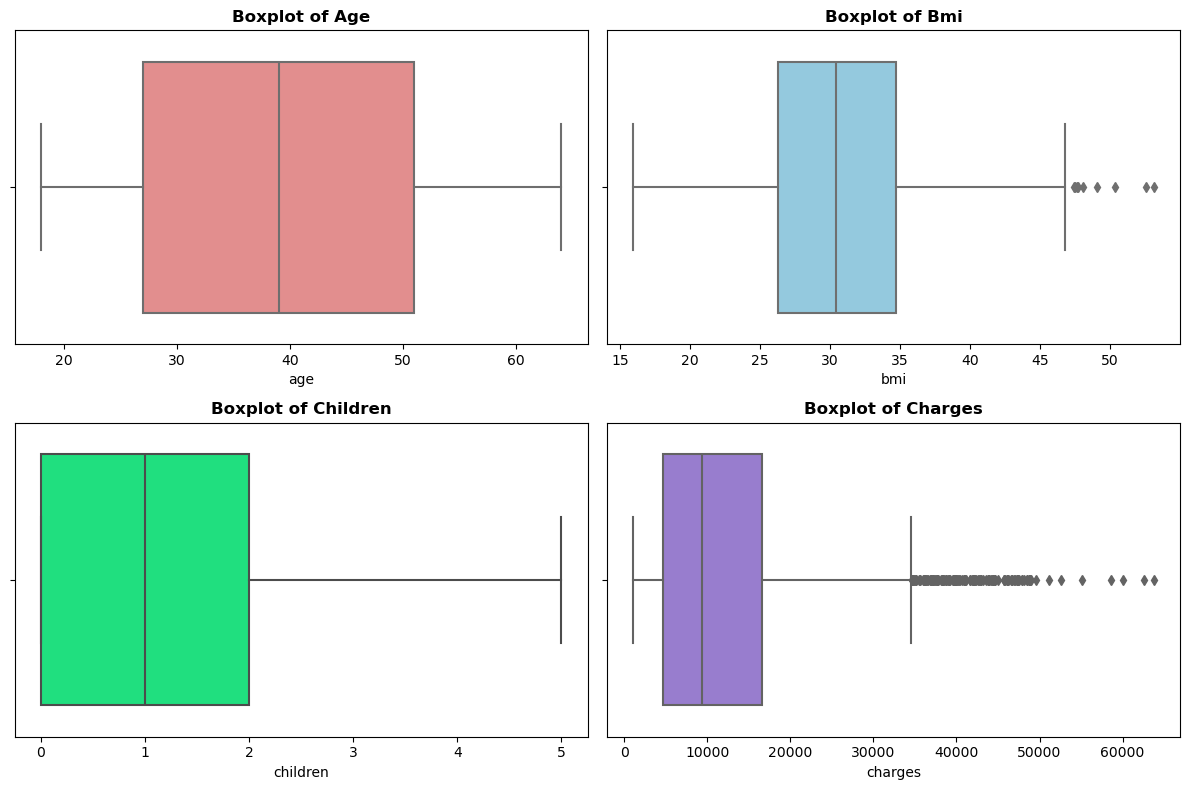

In [12]:
# Create a box plot for numerical attributes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for index, column in enumerate(numerical_columns): 
    # floor division of i / 2
    row_index = index // 2

    # remainder of division i / 2
    col_index = index % 2

    sns.boxplot(x=csv[column], ax=axes[row_index, col_index], color=colors[index])
    axes[row_index, col_index].set_title(f"Boxplot of {column.capitalize()}", fontweight='bold')

plt.tight_layout()
plt.show()

__for creating scatter plots we use `scatter()` function from `matplotlib.pyplot` library. it will take a column for showing in x axes of the plot, a column for showing in y axes of it and a color. we can turn it into a scatter plot matrix with using `subplots()` function and turning it into a 4*4 grid (matrix)__

برای نمایش اسکتر پلات از تابع 

`scatter()`

در کتابخونه

`matplotlib.pyplot`

استفاده میکنیم. این تابع یک ستون برای نمایش در جهت افقی نمودار یک ستون برای نمایش در جهت عمودی آن و 

color 

را میگیرد. ما میتوانیم با استفاده از تابع 

`subplots()`

یک اسکتر پلات ماتریک درست کنیم. این تابع یک تابع با تعداد سطر و ستون دلخواه به ما میدهد که در اینجا ما یک گرید (ماتریکس) ۴*۴ برای نمایش اسکتر پلات ماتریکس درست کردیم

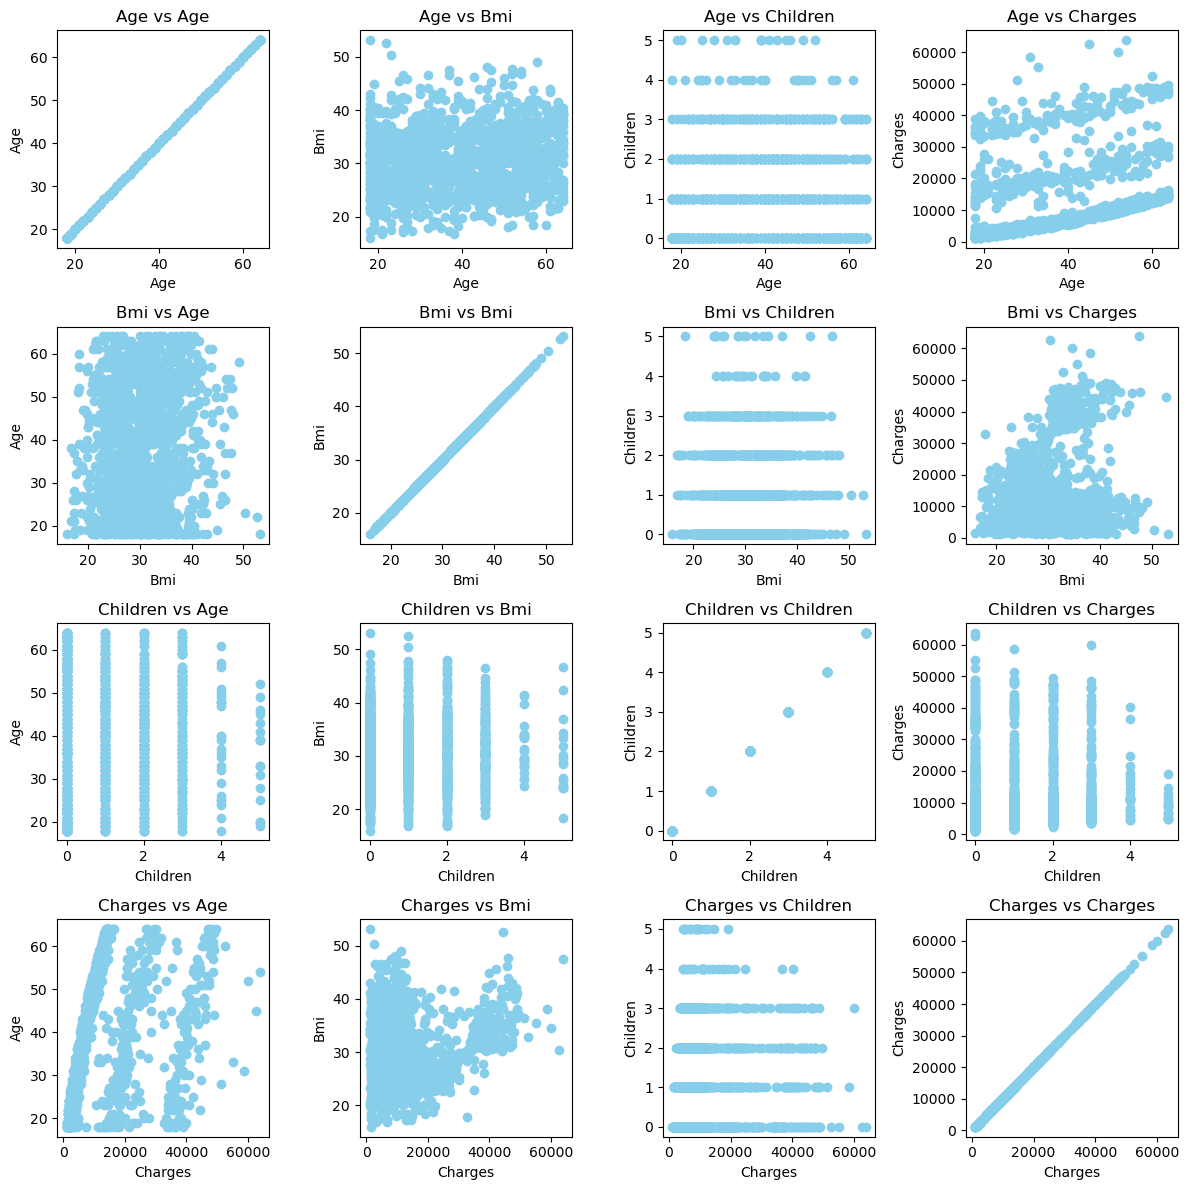

In [13]:
# Create a 3x3 grid of subplots for showing our matrix of scatter plots
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

# Iterate over numerical columns
for i, (index_x, column_x) in enumerate(zip(range(len(numerical_columns)), numerical_columns)):
    if index_x in x_included_indicies:
        for j, (index_y, column_y) in enumerate(zip(range(len(numerical_columns)), numerical_columns)):
            if index_y in y_included_indicies:
                # Plot scatter plot
                axes[i, j].scatter(csv[column_x], csv[column_y], color='skyblue')
                axes[i, j].set_title(f'{column_x.capitalize()} vs {column_y.capitalize()}')
                axes[i, j].set_xlabel(column_x.capitalize())
                axes[i, j].set_ylabel(column_y.capitalize())

plt.tight_layout()
plt.show()

__here we have pairplot matrix which basically shows our scatter plots from earlier but now by each nominal columns status. for example  if we have age as our x axes and bmi as our y axes and hue of smoker of our scatter plot it will show which part of this plot are smokers and which of them are not. we use `pairplot()` function from `seaborn` library to show that.__

در اینجا ما یک 

pairplot matrix

داریم که اسکتر پلات هایی است دسته بندی شده بر اساس 

nominal value 

های ما. مثلا اگر ما 

age 

و bmi

رو به عنوان متغیر های عمودی و افقی داشته باشیم و 

smoker 

رو به عنوان 

hue

روی نمودار ما مشخص میشود که کدوم دسته از سیگار میکشند و کدوم دسته نمیکشند. برای نمایش از 

`pairplot()`

در کتابخونه 

`seaborn`

استفاده میکنیم

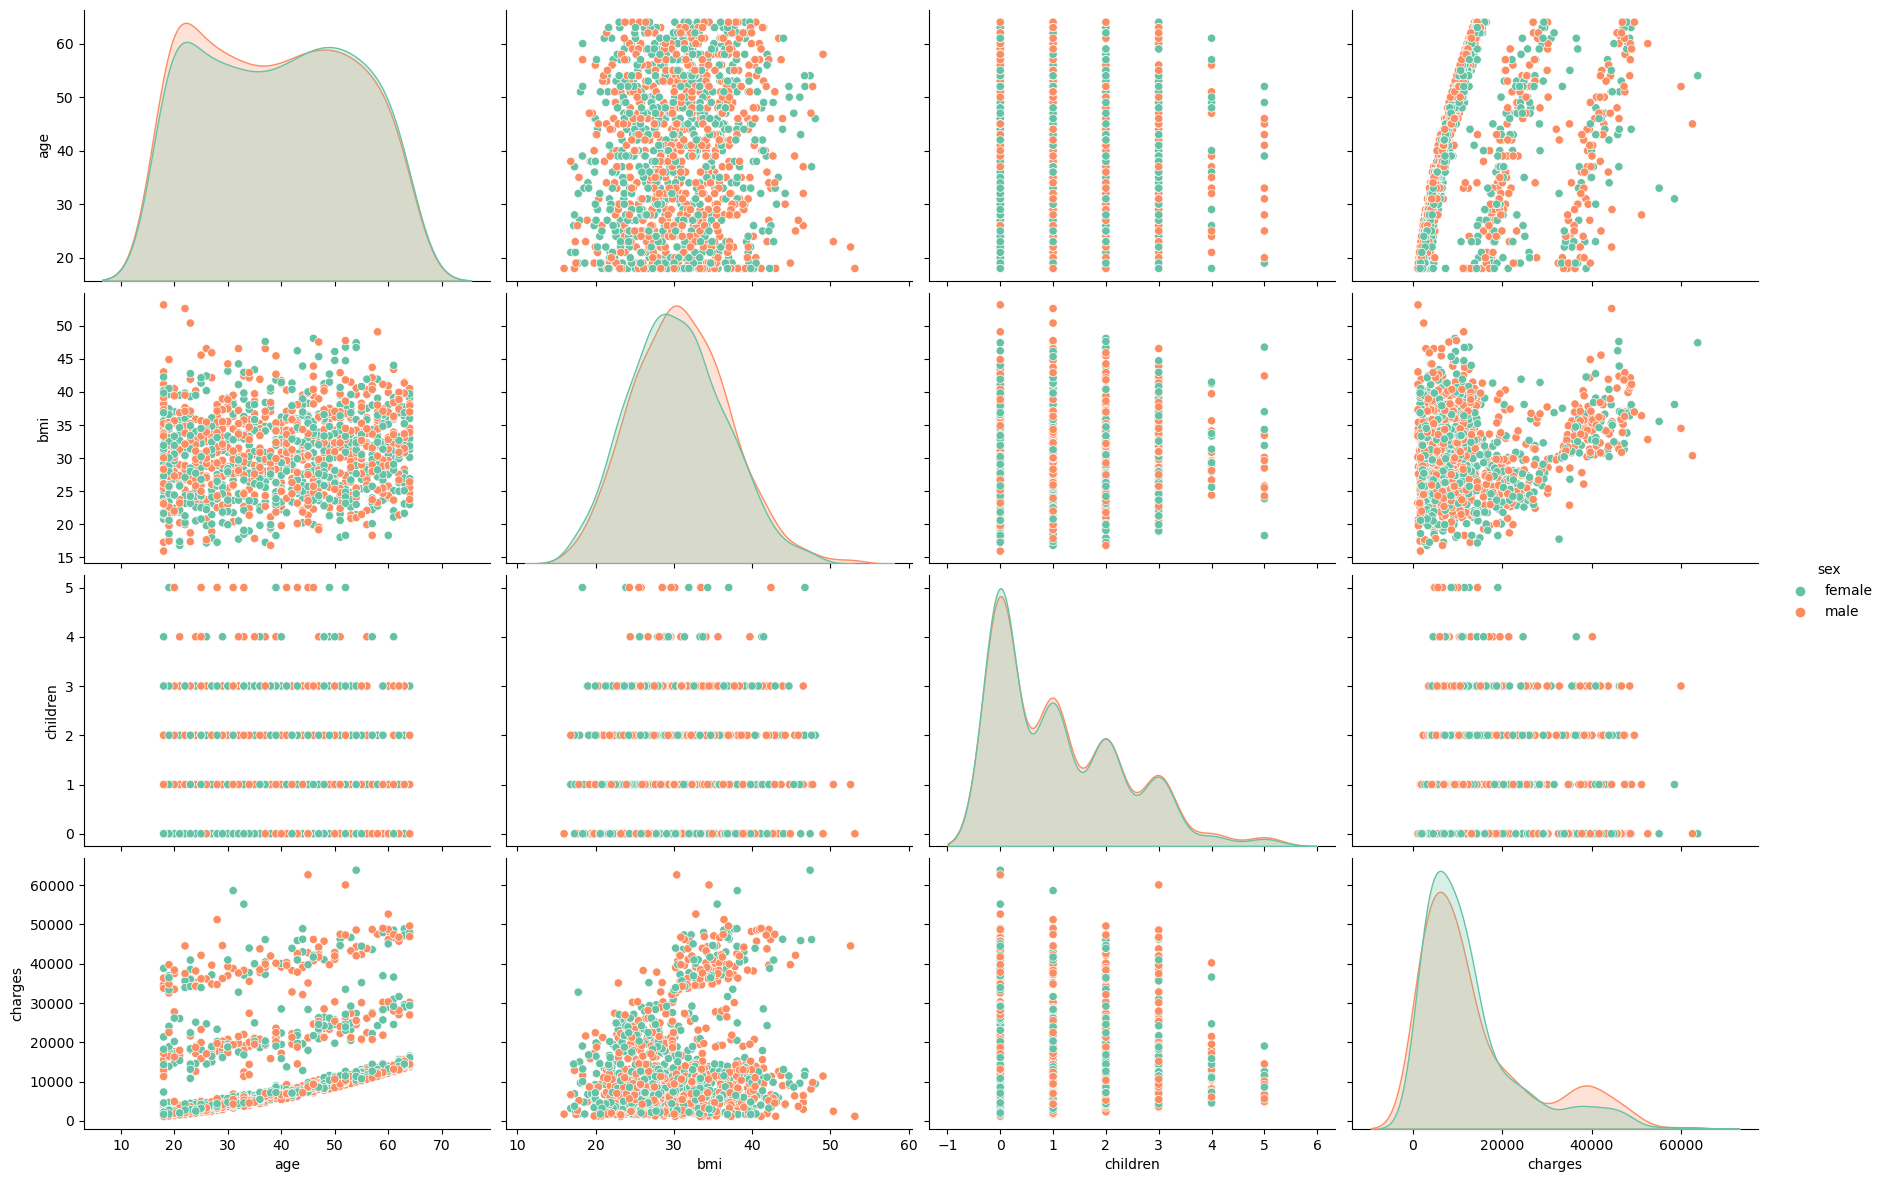

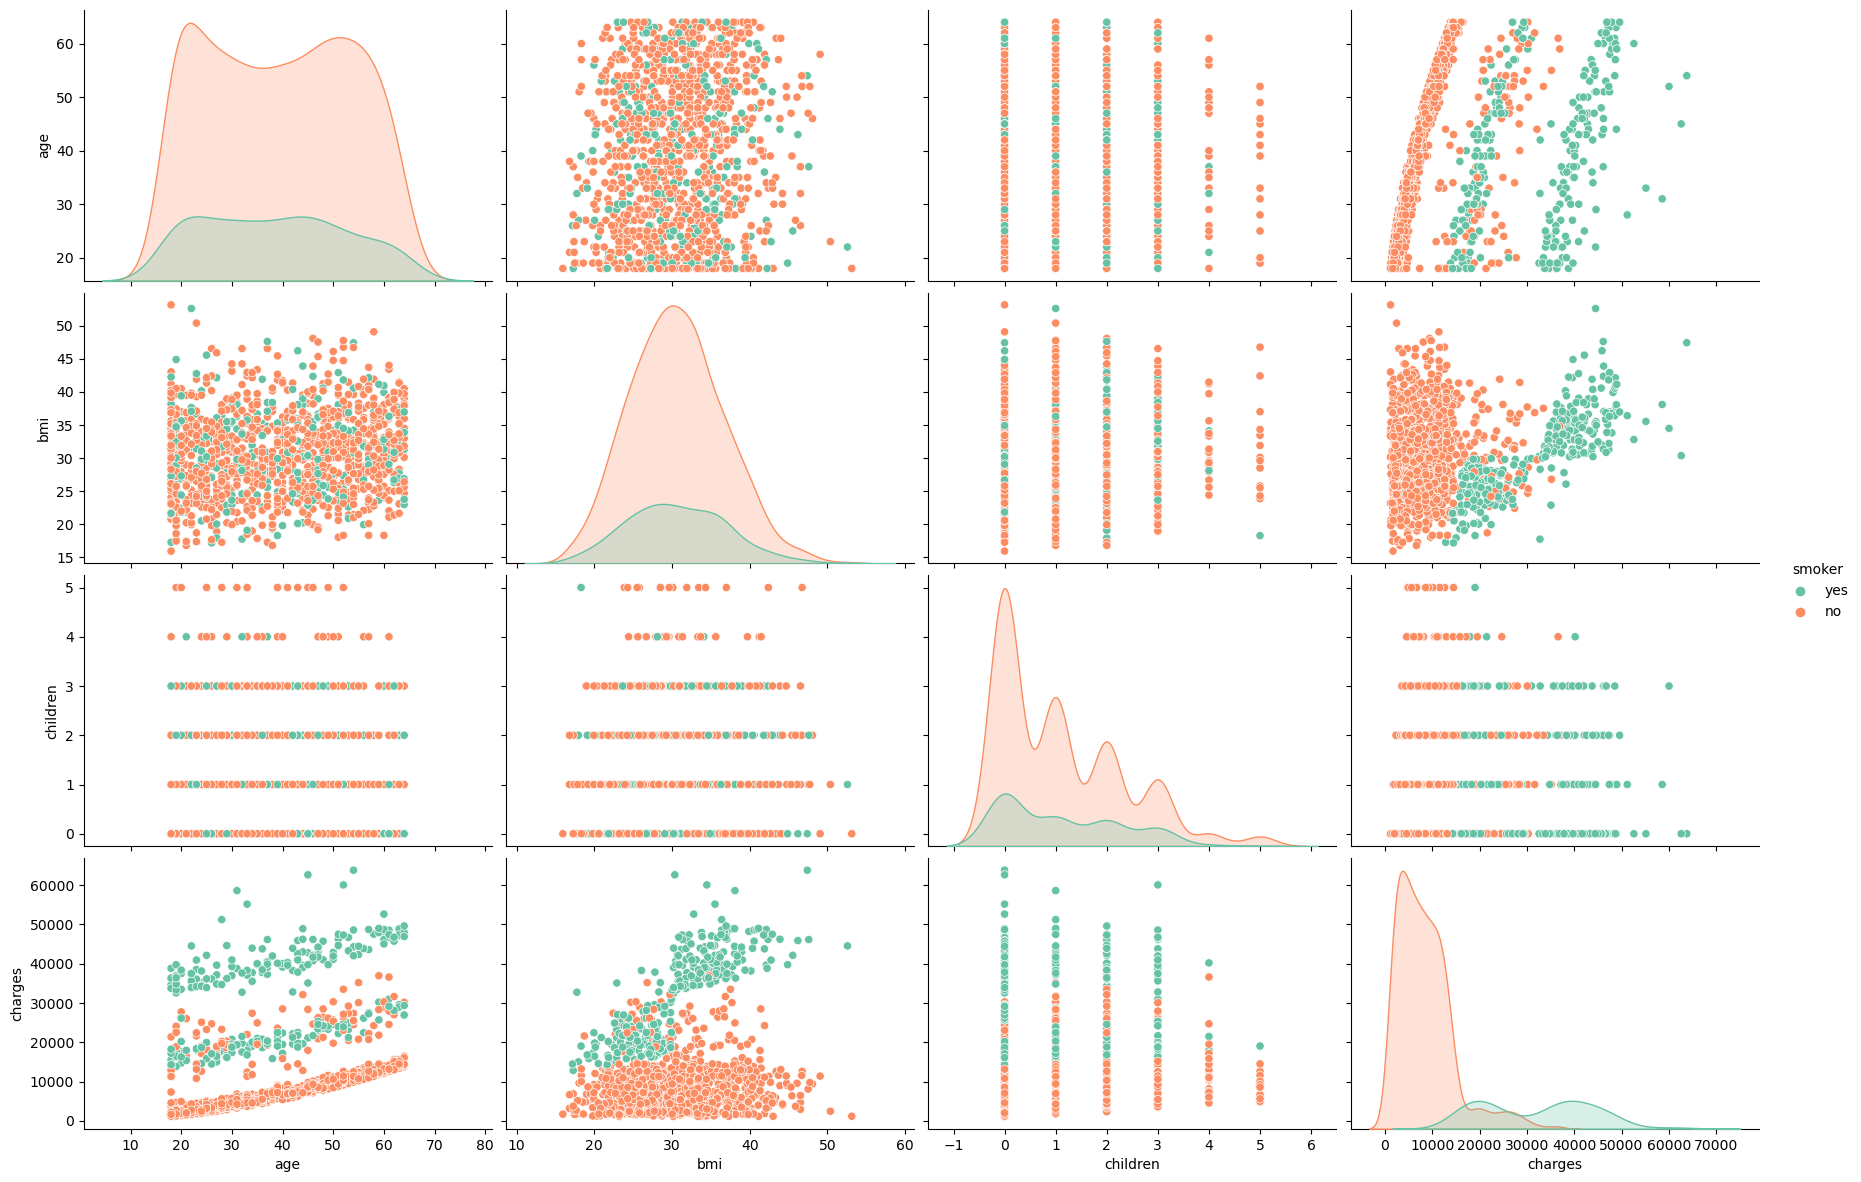

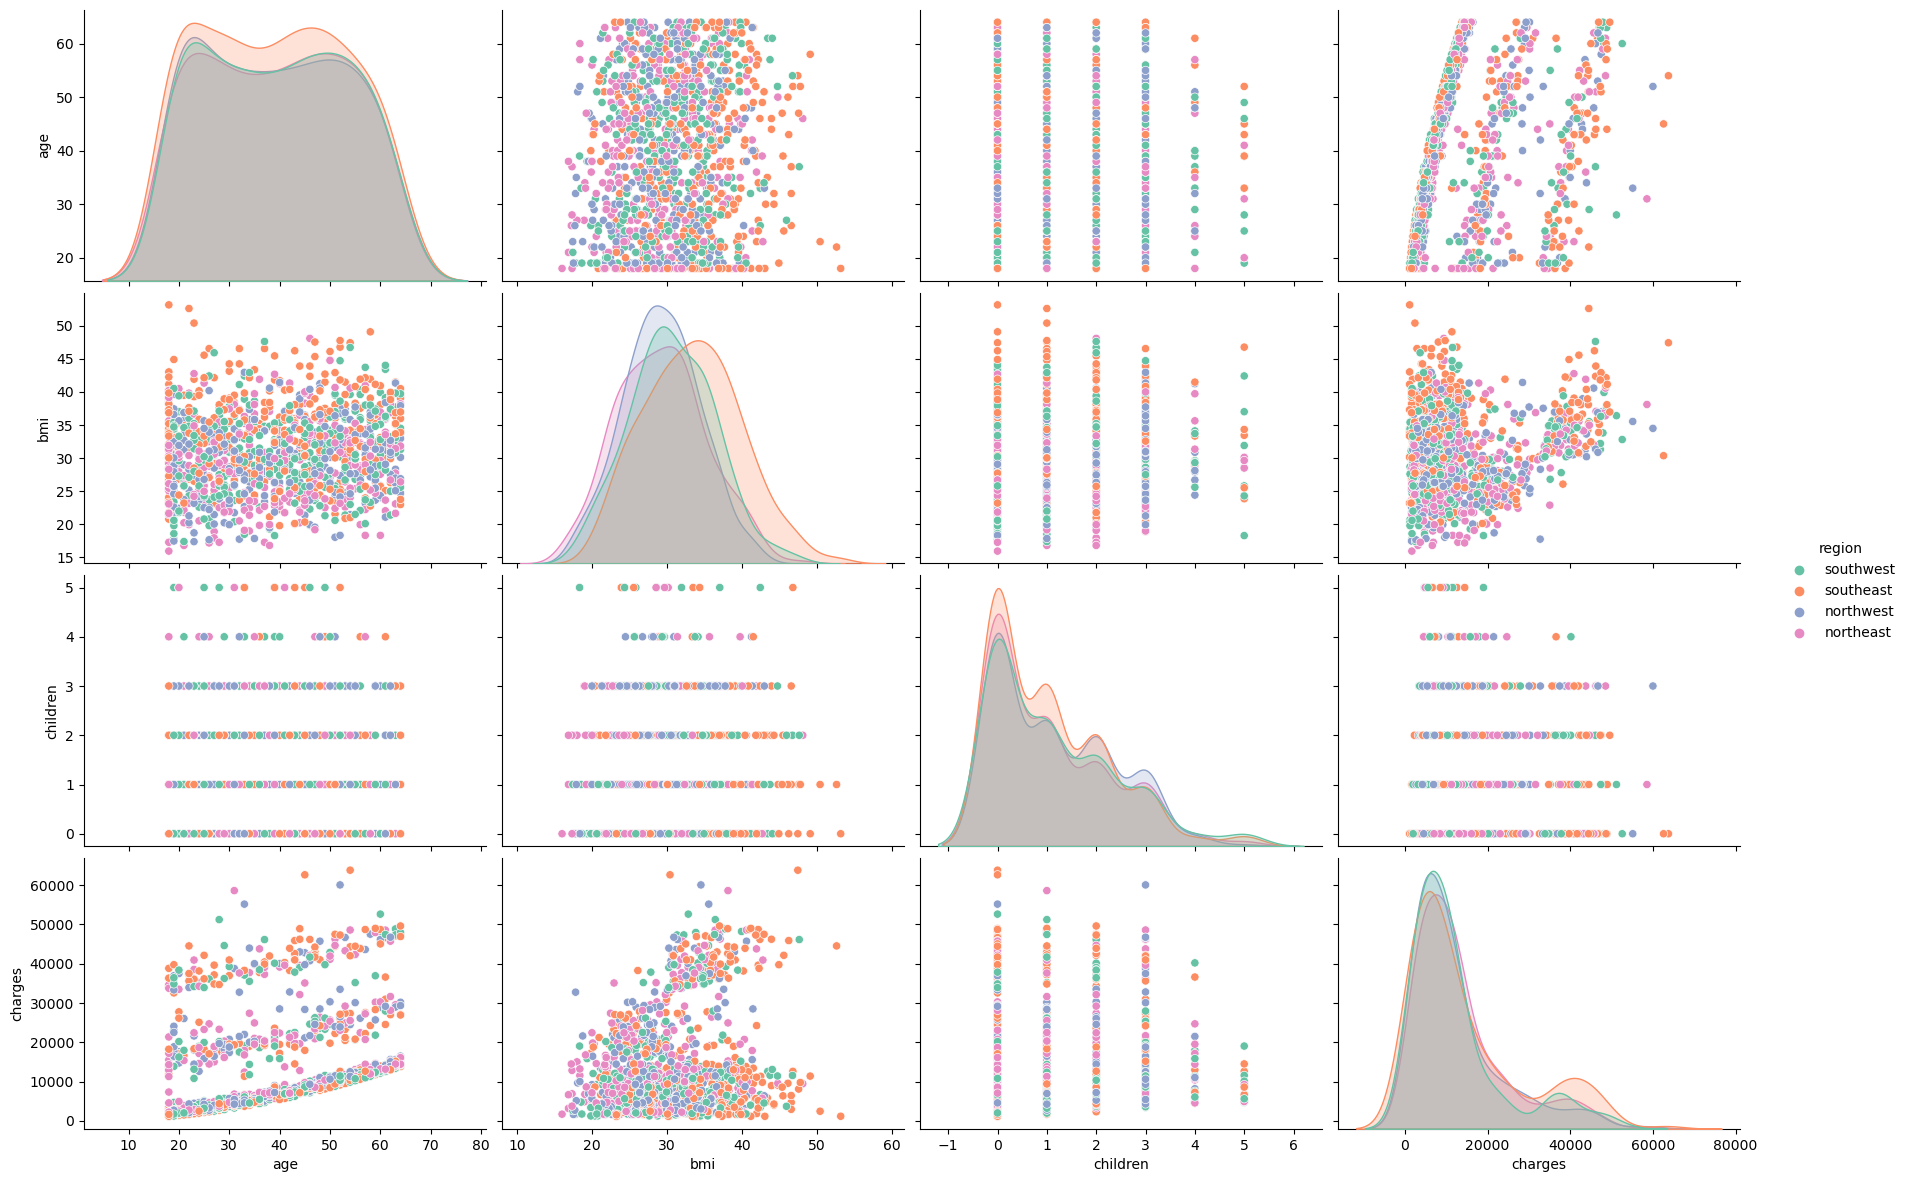

In [14]:
# Create pair plots for each combination of numeric columns with different facets for each nominal column
for nominal_column in nominal_columns:
    # Combine numeric and current nominal column for pairplot
    columns_for_pairplot = numerical_columns + [nominal_column]
    
    # Create a pairplot with scatter plots and histograms
    sns.pairplot(csv[columns_for_pairplot], hue=nominal_column, palette="Set2", height=3, aspect=1.5)
    
    plt.show()

__we can show a countplot with `countplot()` which counts the number of records for each value of our nominal columns.__

ما میتوانیم با استفاده از تابع

`countplot()`

که تعداد رکورد های ثبت شده برای هر متغیر در ستون های 

nominal 

ما را نشان میدهد را به شکل زیر نمایش دهیم

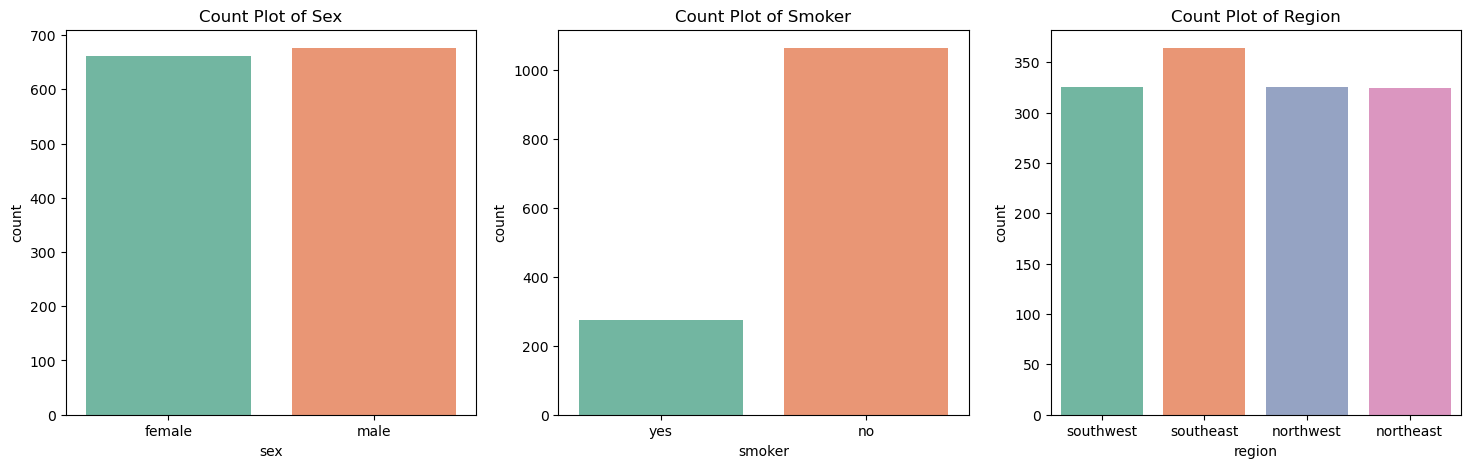

In [15]:
# Create count plots for each nominal variable in a 1x3 grid
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, column in enumerate(nominal_columns):
    sns.countplot(x=column, data=csv, palette="Set2", ax=axes[i])
    axes[i].set_title(f'Count Plot of {column.capitalize()}')